## Observations and Insights 

In [129]:
%matplotlib inline
#%matplotlib notebook

In [130]:
# Julie Baker
# Pymaceuticals
# June 2021

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np 

# Study data files
mouse_metadata_path = os.path.join(os.getcwd(), "data", "Mouse_metadata.csv")
study_results_path = os.path.join(os.getcwd(), "data", "Study_results.csv")
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allmice_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# Display the data table for preview
allmice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [132]:
# Checking the number of mice.
unique_mice = allmice_df['Mouse ID'].nunique()

In [133]:
#J: just getting further sense of the dataset to guage how much data may be lost
# 1893/249 = 7.6; 1893/10 = 189.3
datapoints = allmice_df['Timepoint'].nunique()

In [134]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplo_rows_df = allmice_df[allmice_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print("Duplicate Rows :")
duplo_rows_df

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [135]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = allmice_df.loc[allmice_df['Mouse ID'] == 'g989', :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = allmice_df.loc[allmice_df['Mouse ID'] != 'g989', :]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [137]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [139]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [140]:
#test_indexing = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

In [141]:
# mean tumor volue
tumor_mean_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [142]:
# median tumor volume 
tumor_med_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_med_df

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [143]:
# variance tumor volume 
tumor_var_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_var_df

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [144]:
# standard deviation tumor volume
tumor_std_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_std_df

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [145]:
# SEM of the tumor volume
tumor_sem_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_sem_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [146]:
# merging to single dataframe
summary_lw_df = pd.merge(tumor_mean_df,tumor_med_df, on='Drug Regimen')
summary_lw_df

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [147]:
summary_lw_df = pd.merge(summary_lw_df,tumor_var_df, on='Drug Regimen')
# rename first 3 columns before merging the remaining
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median','Tumor Volume (mm3)':'Variance'})
# merge std & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_std_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
# merge sem & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_sem_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Error of Mean'})
# formatting numbers NOT WORKING
# summary_lw_df = pd.options.display.float_format('{:.2f}').format
summary_lw_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
## TRY TO REFORMAT DATA FRAME: number format, maybe column names

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#J: This is how I did it to start with, so I went back & wrote out the long way above.
summary1_df = clean_mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary1_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [150]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [151]:
# looking at clean_mice so I don't have to scroll up --TAKE OUT LATER
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [152]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x = drug
# y = total number of timepoints
plot1_df = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()
plot1_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [153]:
# I couldn't call the columns later on because Timepoint was missing its name, but now that I can rename these, I should be able to call it for the next step.
# not working, it's not letting me call drug regimen
plot1_df = pd.merge(plot1_df, plot1_df, on='Drug Regimen')
plot1_df

,Timepoint_x,Timepoint_y
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [154]:
# testing some stuff I saw in a video
plot1_df.iloc[:]

,Timepoint_x,Timepoint_y
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [155]:
# renaming the columns & removing the duplicate
plot1_df = plot1_df.rename(columns={'Timepoint_x':'Total Timepoints','Timepoint_y':'duplicates'})

In [156]:
# removing duplicate column
plot1_df = plot1_df.drop(columns='duplicates')

In [157]:
# failed attempt to add treatments as a duplicate column that I can call
# plot1_df['Treatment'] = [treatments]

In [158]:
# failed attempt to add treatments as a duplicate column that I can call
# plot1_again_df['Treatment'] = plot1_df.reindex()

* EXAMPLE FROM CLASS: Create an array that contains the number of users each language has
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

In [159]:
# plot1 in pandas
# creating an empty list for drugs
# list of treatments
treatments = [clean_mice_df.groupby('Drug Regimen')['Drug Regimen'].unique()]
treatments
# DO NOT UNDERSTAND WHY THIS IS SAYING IT'S 1 OBJECT WHEN TRYING TO PASS IT IN TO ADD COLUMN TO DATAFRAMES BELOW

[Drug Regimen
 Capomulin    [Capomulin]
 Ceftamin      [Ceftamin]
 Infubinol    [Infubinol]
 Ketapril      [Ketapril]
 Naftisol      [Naftisol]
 Placebo        [Placebo]
 Propriva      [Propriva]
 Ramicane      [Ramicane]
 Stelasyn      [Stelasyn]
 Zoniferol    [Zoniferol]
 Name: Drug Regimen, dtype: object]

In [160]:
# making list by hand :(
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [161]:
# pulling from activity Pandas.1.13 folder
x_axis = drugs
x_axis

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [162]:
y_axis = (plot1_df['Total Timepoints'])
y_axis

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Total Timepoints, dtype: int64

In [163]:
#tick_locations = [value+0.4 for value in x_axis]

<AxesSubplot:xlabel='Drug Regimen'>

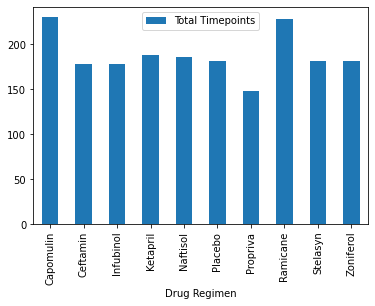

In [164]:
# ** Pands DataFrame BAR CHART **
plot1_df.plot.bar()

<Figure size 1440x216 with 0 Axes>

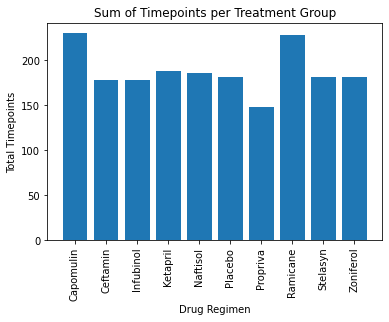

<Figure size 1440x216 with 0 Axes>

In [165]:
# ** Matplotlib BAR CHART **
plt.title('Sum of Timepoints per Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.bar(x=x_axis, height=y_axis)
plt.xticks(x_axis, rotation=90)
plt.figure(figsize=(20,3))

* pulling from activity Pandas.1.13 folder
* Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, plot1_df)
* , color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, plot1_df[1])

* Tell matplotlib that we will be making a bar chart
* Users is our y axis and x_axis is, of course, our x axis
* We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [166]:
# plot1 in matplotlib

* Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

* Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

* Sets the y limits of the current chart
plt.ylim(0, max(users)+5000)

* Give our chart some labels and a tile
plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")

# PIE CHARTS

In [167]:
# creating dataframe for pie charts
mice_gender_df = clean_mice_df.groupby(['Sex'])['Mouse ID'].nunique()
mice_gender_df

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [168]:
# NOT CURRENTLY USING, CONSIDER DITCHING
# transferring counts to variables so I don't have to remember index numbers
female_count = mice_gender_df[0]
male_count = mice_gender_df[1]
female_count, male_count

(123, 125)

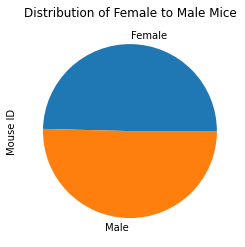

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_panda_pie = mice_gender_df.plot.pie(title= "Distribution of Female to Male Mice")
## HOW DO I REMOVE MOUSE ID?

([<matplotlib.patches.Wedge at 0x124538130>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

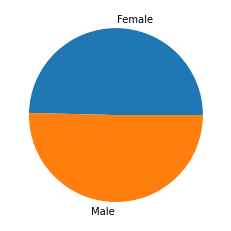

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
gender_counts = [(mice_gender_df[0]), mice_gender_df[1]]
plt.pie(gender_counts, labels= genders) 
# plt.axis("equal")  # ** GETTING TypeError: 'str' object is not callable
# plt.title('Distribution of Female to Male Mice')

## Quartiles, Outliers and Boxplots

In [171]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [172]:
# last/greatest timepoint for each mouse
last_timepoint_df = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [173]:
# inner merge with clean_mice
final_time_df = pd.merge(clean_mice_df, last_timepoint_df, on=['Mouse ID','Timepoint'], how='inner')
final_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [174]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [175]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
chosen_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [176]:
# create empty list to fill with looping
tumor_volumes = []

In [177]:
# creating empty list to fill with treatment from loop
treatment_list = []

In [178]:
# creating empty list to fill with mouse id from loop
mice_list = []

## ** THIS EITHER GENERATES LISTS THAT HAVE WAY TOO MANY VALUES & DO NOT ACTUALL SORT OUT ANYTHING OR I GET VALUEERRORS OF SOME SORT.
# this is the version that runs, but literally keeps everything EIGHT times
# for loop
for mouse in final_time_df:
    if final_time_df['Drug Regimen'].isin(chosen_treatments).any():
        mice_list.append(final_time_df['Mouse ID'])
        treatment_list.append(final_time_df['Drug Regimen'])
        tumor_volumes.append(final_time_df['Tumor Volume (mm3)'])
    else:
        next

## attempting a different way that seems clunky
for i in chosen_treatments:
    for mouse in final_time_df:
        if final_time_df['Drug Regimen'].values == chosen_treatments[i]:
            mice_list.append(final_time_df['Mouse ID'])
            treatment_list.append(final_time_df['Drug Regimen'])
            tumor_volumes.append(final_time_df['Tumor Volume (mm3)'])
        next

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-361-47c5fe9a4303> in <module>
      2 for i in chosen_treatments:
      3     for mouse in final_time_df:
----> 4         if final_time_df['Drug Regimen'].values == chosen_treatments[i]:
      5             mice_list.append(final_time_df['Mouse ID'])
      6             treatment_list.append(final_time_df['Drug Regimen'])

TypeError: list indices must be integers or slices, not str

In [179]:
mice_list

[]

In [180]:
treatment_list

[]

In [181]:
tumor_volumes

[]

# creating a new df using groupby so I can work on plots until I figure out how to get the for-loops to actually work

In [182]:
#Capomulin df sorted by tumor vol
capomulin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Capomulin', :]
capo_sorted_df = capomulin_df.sort_values("Tumor Volume (mm3)")

In [183]:
#Ramicane sorted by tumor volume
ramicane_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Ramicane', :]
rami_sorted_df = ramicane_df.sort_values("Tumor Volume (mm3)")

In [184]:
# Infubinol sorted by tumor volume
infubinol_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Infubinol', :]
infu_sorted_df = infubinol_df.sort_values("Tumor Volume (mm3)")

In [185]:
# Ceftamin sorted by tumor volume
ceftamin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Ceftamin', :]
ceft_sorted_df = ceftamin_df.sort_values("Tumor Volume (mm3)")

In [186]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# copied from in-class activity
# _Capomulin_
quartiles = (capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]))
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

minvalue = (capomulin_df['Tumor Volume (mm3)'].min())
maxvalue = (capomulin_df['Tumor Volume (mm3)'].max())
print(f'The lowest value is {minvalue} & the highest value is {maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if minvalue < lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({minvalue}) is < the lower_bound ({lower_bound}).')
if maxvalue > upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({maxvalue} is > the upper_bound ({upper_bound}).')

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lowest value is 23.34359787 & the highest value is 47.68596303.


In [187]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Ramicane_
quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

minvalue = ramicane_df['Tumor Volume (mm3)'].min()
maxvalue = ramicane_df['Tumor Volume (mm3)'].max()
print(f'The lowest value is {minvalue} & the highest value is {maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if minvalue < lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({minvalue}) is < the lower_bound ({lower_bound}).')
if maxvalue > upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({maxvalue} is > the upper_bound ({upper_bound}).')

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lowest value is 22.05012627 & the highest value is 45.22086888.


In [188]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Infubinol_
quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

minvalue = infubinol_df['Tumor Volume (mm3)'].min()
maxvalue = infubinol_df['Tumor Volume (mm3)'].max()
print(f'The lowest value is {minvalue} & the highest value is {maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if minvalue < lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({minvalue}) is < the lower_bound ({lower_bound}).')
if maxvalue > upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({maxvalue} is > the upper_bound ({upper_bound}).')

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lowest value is 36.321345799999996 & the highest value is 72.2267309.
WAIT! You might have an outlier on the lower end of your distribution. Your minimum (36.321345799999996) is < the lower_bound (36.83290494999999).


In [189]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Ceftamin_
quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

minvalue = ceftamin_df['Tumor Volume (mm3)'].min()
maxvalue = ceftamin_df['Tumor Volume (mm3)'].max()
print(f'The lowest value is {minvalue} & the highest value is {maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if minvalue < lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({minvalue}) is < the lower_bound ({lower_bound}).')
if maxvalue > upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({maxvalue} is > the upper_bound ({upper_bound}).')

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The lowest value is 45.0 & the highest value is 68.92318457.


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [190]:
# Capomulin tumor values
capo_tumors = [capo_sorted_df['Tumor Volume (mm3)']]

In [191]:
# Ramicane tumor values
rami_tumors = [rami_sorted_df['Tumor Volume (mm3)']]

In [192]:
# Infubinol tumor values
infu_tumors = [infu_sorted_df['Tumor Volume (mm3)']]

In [193]:
# Ceftamin tumor values
ceft_tumors = [ceft_sorted_df['Tumor Volume (mm3)']]

In [194]:
# box plot


In [195]:
labels = chosen_treatments

In [196]:
data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]

## Just making separate box plots until I can figure out why the code doesn't work when I try to do them on single plot.

##This code is directly from the link we were given on the homework readme file about how to put all 4 boxes on the same plot
data = [data, d2, d2[::2]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()


## This is me translating my data into the same exact code -- 
# I get ValueError: X must have 2 or fewer dimensions
data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1247754c0>,
 'caps': [<matplotlib.lines.Line2D at 0x124775f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x124775970>],
 'medians': [<matplotlib.lines.Line2D at 0x12352a730>],
 'fliers': [<matplotlib.lines.Line2D at 0x12352a460>],
 'means': []}

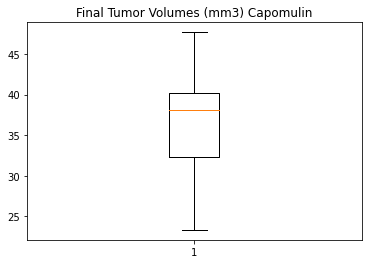

In [197]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes (mm3) Capomulin')
ax1.labels = chosen_treatments
ax1.boxplot(capo_tumors)

{'whiskers': [<matplotlib.lines.Line2D at 0x1235383a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1235359a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x123538b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1236b99d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1236b9a00>],
 'means': []}

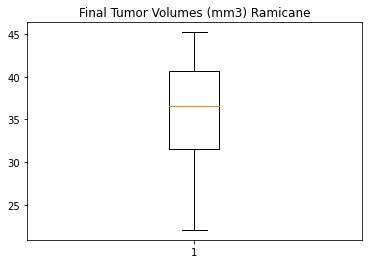

In [198]:
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volumes (mm3) Ramicane')
ax2.labels = chosen_treatments
ax2.boxplot(rami_tumors)

{'whiskers': [<matplotlib.lines.Line2D at 0x123d18520>,
 'caps': [<matplotlib.lines.Line2D at 0x1238302b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1242bfc70>],
 'medians': [<matplotlib.lines.Line2D at 0x1236bdfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1236bd520>],
 'means': []}

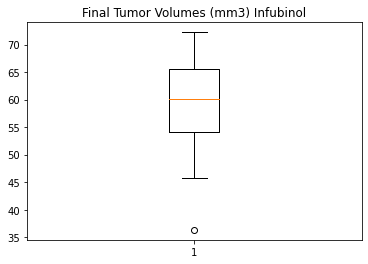

In [199]:
fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volumes (mm3) Infubinol')
ax3.labels = chosen_treatments
ax3.boxplot(infu_tumors)

{'whiskers': [<matplotlib.lines.Line2D at 0x12384b1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12342fdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x123a8b580>],
 'medians': [<matplotlib.lines.Line2D at 0x123a8aac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12399bdf0>],
 'means': []}

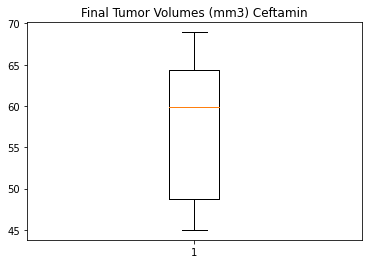

In [200]:
fig4, ax4 = plt.subplots()
ax4.set_title('Final Tumor Volumes (mm3) Ceftamin')
ax4.labels = chosen_treatments
ax4.boxplot(ceft_tumors)

# rectangular box plot from matplotlib website
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

## Line and Scatter Plots

In [201]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [202]:
# choosing a mouse from capomulin -- only choosing from mice that made it to the final time point
capo_winners_df = capomulin_df.loc[capomulin_df['Timepoint'] == 45, :]
capo_winners_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2
22,w914,Capomulin,Male,24,21,45,36.041047,2


In [203]:
# choosing mouse j119 -- need to pull that data from the full data frame
j119_df = clean_mice_df.loc[clean_mice_df['Mouse ID'] == 'j119', :]
j119_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [204]:
# line graph for j119
x_axis_j119 = j119_df['Timepoint']
x_joined_j119 = Series.str.split(x_axis_j119)
type(x_axis_j119)

NameError: name 'Series' is not defined

In [117]:
points_j119 = [j119_df['Tumor Volume (mm3)']]
type(points_j119)

list

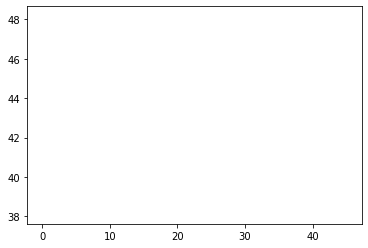

In [118]:
plt.plot(x_axis_j119, points_j119)
plt.show()

Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [95]:
# dataframe for capomulin only
capomulin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Capomulin', :]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [121]:
# should I have done all lines of data rather than just endpoint?
weight = [capomulin_df['Weight (g)']]
weight

[1      17
 2      15
 3      17
 6      17
 10     17
 12     17
 13     17
 14     19
 16     17
 20     20
 22     21
 24     19
 28     19
 30     21
 31     22
 32     21
 34     23
 35     23
 36     21
 37     22
 38     23
 39     21
 40     25
 45     24
 180    25
 Name: Weight (g), dtype: int64]

In [97]:
# should I have done the average of the tumors for all of the datapoints rather than just the endpoints?
tumor_vol = [capomulin_df['Tumor Volume (mm3)']]

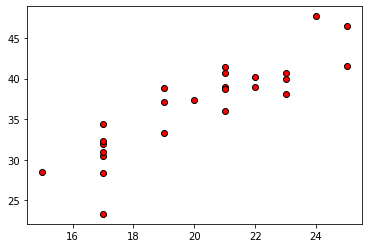

In [98]:
plt.scatter(weight, tumor_vol, marker='o', facecolors='red', edgecolors='black')

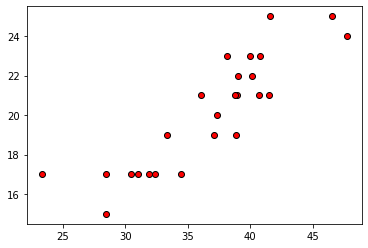

In [99]:
# just looking at reverse
plt.scatter(tumor_vol, weight, marker='o', facecolors='red', edgecolors='black')
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [128]:
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

ValueError: x and y must have length at least 2.